# Székely Dániel - JAXC3C 

Pontosság: 1256


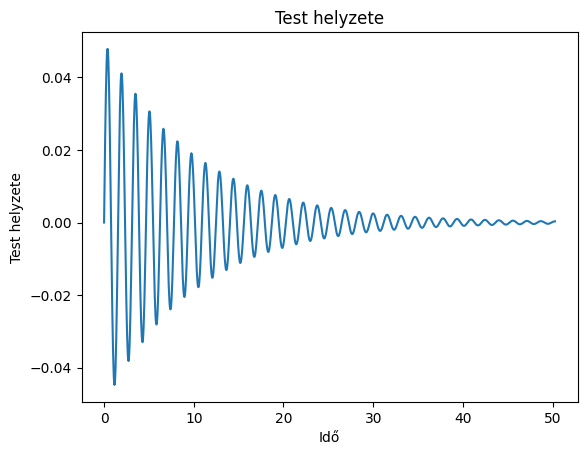

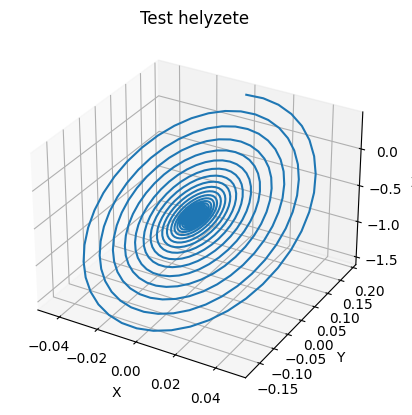

In [32]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.animation as animation
import random

k = 0.008 * 1000 # Rugó állandója (N/mm * 1000 = N/m)
m = 0.5 # Test tömege (kg)
g = 9.81  # Gravitációs gyorsulás (m/s^2)
L = (m*g)/k # Rugó nyújtatlan hossza (m) [képlet Szutyányi Márk tanár Úrral egyeztetve gyakorlati óra után]

T = 2*np.pi*np.sqrt(m/k) # Lengésidő

c_r = 0.1  # Rugó vesztesége
c_m = 0.05  # Test vesztesége

# A test kezdeti helyzete
x0 = 0
y0 = random.uniform(0.1, 0.5)
z0 = random.uniform(0.1, 0.5)

# A test kezdeti sebessége
szog = np.random.rand() * np.pi  # Véletlenszerű szög
vx0 = abs(random.uniform(0.1, 0.5))
vy0 = abs(random.uniform(0.1, 0.5) * np.sin(szog))
vz0 = abs(random.uniform(0.1, 0.5) * np.cos(szog))

# Kezdeti állapotvektor
state0 = np.array([x0, y0, z0, vx0, vy0, vz0])

# Ábrázoláshoz szükséges skálázás
scale = 1
if (k/1000) < 1:
    scale = k*4
else:
    scale = k*(k/10000)

# Időpillanatok
t_start = 0
t_end = scale*T  # Az oszcilláció energiájának csökkenéséhez hosszabb időt szimulálunk
num_points = int(t_end*25)  # Pontosság
t_eval = np.linspace(t_start, t_end, num_points)
print(f'Pontosság: {num_points}')

# Mozgásegyenlet
def motion_equations(t, state):
    x, y, z, vx, vy, vz = state
    dxdt = vx
    dydt = vy
    dzdt = vz
    dvxdt = (-k/m * x) - (c_r/m * vx) - (c_m/m * abs(vx) * np.sign(x))
    dvydt = (-k/m * y) - (c_r/m * vy) - (c_m/m * abs(vy) * np.sign(y))
    dvzdt = (-k/m * z) - (c_r/m * vz) - (c_m/m * abs(vz) * np.sign(z)) - g
    return [dxdt, dydt, dzdt, dvxdt, dvydt, dvzdt]

sol = solve_ivp(motion_equations, [t_start, t_end], state0, t_eval=t_eval, method='RK45')

plt.plot(sol.t, sol.y[0])
plt.xlabel('Idő')
plt.ylabel('Test helyzete')
plt.title('Test helyzete')
plt.show()

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot(sol.y[0], sol.y[1], sol.y[2])
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.set_title('Test helyzete')
plt.show()

# Videó animáció

In [ ]:
Writer = animation.writers['ffmpeg']
writer = Writer(fps=30, bitrate=550)

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

def update(i):
    ax.clear()
    new_scale = scale/25
    ax.set_xlim([-new_scale, new_scale])
    ax.set_ylim([-new_scale, new_scale])
    ax.set_zlim([-new_scale, new_scale])
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_zlabel('Z')
    ax.set_title('Oscillating Mass on a Spring')
    x, y, z, vx, vy, vz = sol.y[:, i]
    ax.scatter(x, y, z, color='blue')
    ax.plot([0, x], [0, y], [0, z], color='black')
    print(f'{i/num_points*100:.2f} %')

ani = animation.FuncAnimation(fig, update, frames=num_points, repeat=False)
ani.save('oscillating_mass.mp4', writer=writer)